<a href="https://colab.research.google.com/github/sisi195/Marketing-Optimization/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MarketMind: Machine Learning for Marketing Optimization


## Introduction
MarketMind leverages machine learning to refine marketing strategies, analyze consumer behavior, and unlock deep insights into ad performance. This notebook sets up the environment to analyze datasets, perform exploratory data analysis, and answer key questions with machine learning techniques.


## Importing necessary libraries

In [64]:
!ls


 CONSUMERBEHAVIOR.csv			      logistic_regression_plots.png
'crossshopbrandbreakoutcleaned(Sheet2).csv'   Regression_Coefficients.png
 CTR_by_Ad_Type.png			      sample_data
 CTR_Conversion_Rate.png		      social_network_Adscleaned.csv


In [ ]:
from IPython.display import Image
Image("Interactive_CTR_BarChart.png")


In [29]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Upload Datasets
Upload the following datasets:
- `social_network_Adscleaned.csv`: Social network demographic data.
- `CONSUMERBEHAVIOR.csv`: Ad engagement and click-through data.
- `crossshopbrandbreakoutcleaned(Sheet2).csv`: Cross-brand shopping behavior data.


In [43]:
# Load the datasets
social_network_data = pd.read_csv('social_network_Adscleaned.csv', low_memory=False)

consumer_behavior_data = pd.read_csv('CONSUMERBEHAVIOR.csv')
crossshop_data = pd.read_csv('crossshopbrandbreakoutcleaned(Sheet2).csv', low_memory=False)

# Rename the column in Social Network dataset
social_network_data = social_network_data.rename(columns={'Made Purchase': 'Made_Purchase'})

# Verify the change
print("--- Updated Social Network Data Columns ---")
print(social_network_data.columns)

# Rename the columns in the Consumer Behavior Datset
consumer_behavior_data = consumer_behavior_data.rename(columns={
    'Ad Type': 'Ad_Type',
    'Ad Topic': 'Ad_topic',
    'Ad Placement': 'Ad_Placement',
    'Click Time': 'Click_Time',
    'Conversion Rate': 'Conversion_Rate'
})

# Verify the updated column names
print("--- Updated Consumer Behavior Data Columns ---")
print(consumer_behavior_data.columns)


consumer_behavior_data = pd.read_csv('CONSUMERBEHAVIOR.csv')
crossshop_data = pd.read_csv('crossshopbrandbreakoutcleaned(Sheet2).csv', low_memory=False)

--- Updated Social Network Data Columns ---
Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Made_Purchase'], dtype='object')
--- Updated Consumer Behavior Data Columns ---
Index(['Age', 'Gender', 'Income', 'Location', 'Ad_Type', 'Ad_topic',
       'Ad_Placement', 'Clicks', 'Click_Time', 'Conversion_Rate', 'CTR'],
      dtype='object')


# Inspect Data and prefoming exploratory data analysis (EDA)

### Display first few rows of each dataset


In [31]:
# Display first five rows of social network ads
print("Social Network Dataset:")
print(social_network_data.head())

Social Network Dataset:
    User ID  Gender  Age  EstimatedSalary  Made_Purchase
0  15624510    Male   19            19000              0
1  15810944    Male   35            20000              0
2  15668575  Female   26            43000              0
3  15603246  Female   27            57000              0
4  15804002    Male   19            76000              0


In [32]:
# Display the first 5 rows of consumer behavior
print("\nConsumer Behavior Dataset:")
print(consumer_behavior_data.head())


Consumer Behavior Dataset:
   Age  Gender    Income  Location Ad Type Ad Topic   Ad Placement  Clicks  \
0   61    Male  35717.43     Urban  Banner   Travel   Social Media       3   
1   41    Male  47453.25     Rural   Video   Travel  Search Engine       5   
2   49  Female  68126.35     Rural    Text     Food   Social Media       4   
3   68  Female  64585.73  Suburban    Text   Health        Website       6   
4   63    Male  21109.40     Urban  Native  Fashion  Search Engine       5   

   Click Time  Conversion Rate     CTR  
0   1/18/2024           0.0981  0.0737  
1   4/24/2023           0.0937  0.0592  
2   2/24/2024           0.1912  0.0563  
3  12/13/2023           0.1122  0.0232  
4    7/2/2023           0.1426  0.0539  


In [33]:
# Display the first 5 rows of cross_brand_
print("\nCross-Brand Shopping Dataset:")
print(crossshop_data.head())


Cross-Brand Shopping Dataset:
            BRAND_NAME  BRAND_ID     CROSS_BRAND_NAME  CROSS_BRAND_ID  \
0              BONANZA   10389.0           KONA GRILL         11640.0   
1  ROBERT FRESH MARKET   12379.0  ROBERT FRESH MARKET         12379.0   
2                FAIRE   27441.0              WHATNOT         23451.0   
3          COMMENTSOLD   29770.0  LIFE TIME IN-CENTER         28879.0   
4        FLUX FOOTWEAR   29759.0            BILLABONG         13747.0   

        PERIOD_TYPE             PERIOD PERIOD_START_DT PERIOD_END_DT  \
0   DISCRETE_35_DAY   35 DE 2023-01-22      12/19/2022     1/22/2023   
1   DISCRETE_35_DAY   35 DE 2024-06-30       5/27/2024     6/30/2024   
2             MONTH            2022M04        4/1/2022     4/30/2022   
3   DISCRETE_35_DAY   35 DE 2024-05-26       4/22/2024     5/26/2024   
4  DISCRETE_182_DAY  182 DE 2024-10-06        4/8/2024     10/6/2024   

   SPEND_AMOUNT  TRANS_COUNT  INDIVIDUAL_COUNT  
0         55.42          1.0               1.0  

### Display the shape of each dataset

In [21]:
# Check the shape of each dataset
print("Social Network Dataset Shape:", social_network_data.shape)
print("Consumer Behavior Dataset Shape:", consumer_behavior_data.shape)
print("Cross-Brand Shopping Dataset Shape:", crossshop_data.shape)

Social Network Dataset Shape: (400, 5)
Consumer Behavior Dataset Shape: (1000, 11)
Cross-Brand Shopping Dataset Shape: (1048574, 11)


### Descriptive Statistics of each dataset

In [34]:
# View basic statistics for Social Network
print("Social Network Dataset Statistics:")
print(social_network_data.describe())

Social Network Dataset Statistics:
            User ID         Age  EstimatedSalary  Made_Purchase
count  4.000000e+02  400.000000       400.000000     400.000000
mean   1.569154e+07   37.655000     69742.500000       0.357500
std    7.165832e+04   10.482877     34096.960282       0.479864
min    1.556669e+07   18.000000     15000.000000       0.000000
25%    1.562676e+07   29.750000     43000.000000       0.000000
50%    1.569434e+07   37.000000     70000.000000       0.000000
75%    1.575036e+07   46.000000     88000.000000       1.000000
max    1.581524e+07   60.000000    150000.000000       1.000000


In [35]:
# View basic Stats of Consumer Behavior
print("\nConsumer Behavior Dataset Statistics:")
print(consumer_behavior_data.describe())


Consumer Behavior Dataset Statistics:
              Age         Income      Clicks  Conversion Rate          CTR
count  1000.00000    1000.000000  1000.00000      1000.000000  1000.000000
mean     33.83400   49437.076720     5.10300         0.199816     0.049489
std      14.79545   19807.213405     2.19846         0.116962     0.020190
min     -10.00000   -3869.550000     0.00000         0.006100     0.000000
25%      24.00000   36321.787500     4.00000         0.112750     0.035175
50%      34.00000   49503.520000     5.00000         0.182150     0.049600
75%      44.00000   62596.755000     6.00000         0.271450     0.063200
max      76.00000  116432.020000    13.00000         0.631200     0.115900


In [36]:
# View basic Stats of Crossshop dataseet
print("\nCross-Brand Shopping Dataset Statistics:")
print(crossshop_data.describe())


Cross-Brand Shopping Dataset Statistics:
           BRAND_ID  CROSS_BRAND_ID  SPEND_AMOUNT    TRANS_COUNT  \
count    100.000000      100.000000  1.000000e+02     100.000000   
mean   18052.540000    18585.150000  1.926477e+05    5602.480000   
std     6503.448236     6668.329617  1.106769e+06   31365.110479   
min    10127.000000    10263.000000  1.075000e+01       1.000000   
25%    12773.250000    12645.250000  2.675075e+02       4.000000   
50%    16632.000000    16643.000000  2.317275e+03      32.500000   
75%    23513.000000    23735.500000  1.437303e+04     125.250000   
max    31631.000000    31435.000000  1.017858e+07  237045.000000   

       INDIVIDUAL_COUNT  
count        100.000000  
mean        1258.680000  
std         7100.984291  
min            1.000000  
25%            2.000000  
50%           11.500000  
75%           59.500000  
max        55641.000000  


### Display Information on datasets

In [39]:
# Check column data types and non-null values of Social Network dataset
print("Social Network Dataset Info:")
print(social_network_data.info())

Social Network Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Made_Purchase    400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [40]:
# Check column data types and non-null values of Consumer Behavior
print("\nConsumer Behavior Dataset Info:")
print(consumer_behavior_data.info())


Consumer Behavior Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1000 non-null   int64  
 1   Gender           1000 non-null   object 
 2   Income           1000 non-null   float64
 3   Location         1000 non-null   object 
 4   Ad Type          1000 non-null   object 
 5   Ad Topic         1000 non-null   object 
 6   Ad Placement     1000 non-null   object 
 7   Clicks           1000 non-null   int64  
 8   Click Time       1000 non-null   object 
 9   Conversion Rate  1000 non-null   float64
 10  CTR              1000 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB
None


In [41]:
# Check column data types and non-null values of Crossshop
print("\nCross-Brand Shopping Dataset Info:")
print(crossshop_data.info())


Cross-Brand Shopping Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BRAND_NAME        100 non-null    object 
 1   BRAND_ID          100 non-null    float64
 2   CROSS_BRAND_NAME  100 non-null    object 
 3   CROSS_BRAND_ID    100 non-null    float64
 4   PERIOD_TYPE       100 non-null    object 
 5   PERIOD            100 non-null    object 
 6   PERIOD_START_DT   100 non-null    object 
 7   PERIOD_END_DT     100 non-null    object 
 8   SPEND_AMOUNT      100 non-null    float64
 9   TRANS_COUNT       100 non-null    float64
 10  INDIVIDUAL_COUNT  100 non-null    float64
dtypes: float64(5), object(6)
memory usage: 88.0+ MB
None


##  Project Questions
### What factors influence consumer purchasing decisions?
Apply Logistic Regression on the `social_network_Adscleaned.csv` dataset to predict purchasing likelihood based on demographic and salary data.


Logistic Regression Model Accuracy: 0.8875


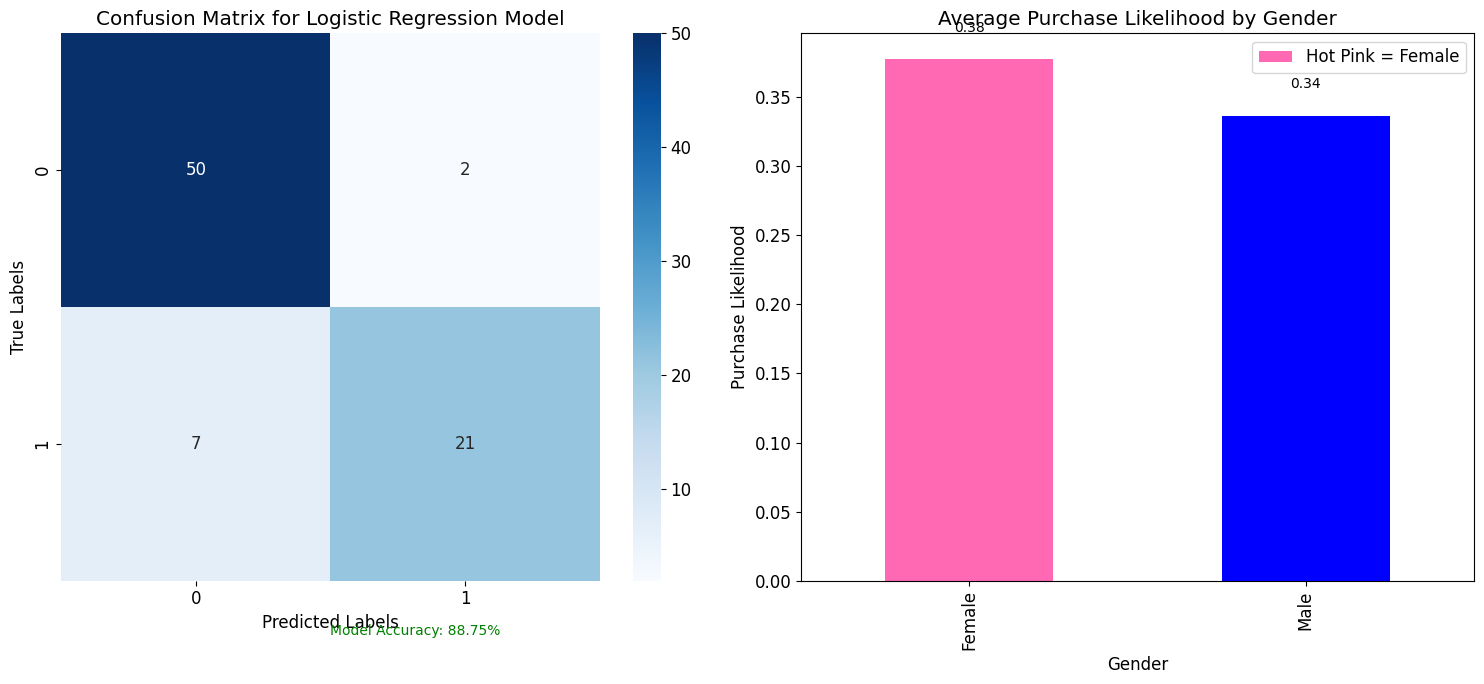

In [54]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Prepare the data
X = social_network_data[['Age', 'EstimatedSalary']]  # Features
y = social_network_data['Made_Purchased']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Logistic Regression Model Accuracy: {accuracy}")

# Generate predictions on test data
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set global font style and size
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'DejaVu Sans'  # Replace Arial with DejaVu Sans for Colab compatibility

# Create subplots for Confusion Matrix and Purchase Likelihood by Gender
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', ax=ax[0])
ax[0].set_title("Confusion Matrix for Logistic Regression Model")
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")

# Add insights as annotations
ax[0].text(0.5, -0.1, f"Model Accuracy: {accuracy:.2%}", fontsize=10, color='green', transform=ax[0].transAxes)

# Plot bar chart for purchase likelihood by gender
gender_results = social_network_data.groupby('Gender')['Made_Purchased'].mean()
gender_results.plot(kind='bar', color=['hotpink', 'blue'], ax=ax[1])
ax[1].set_title('Average Purchase Likelihood by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Purchase Likelihood')
ax[1].legend(['Hot Pink = Female', 'Blue = Male'], loc='upper right')

# Highlight significant data point using a marker
for i, value in enumerate(gender_results):
    ax[1].text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

# Improve layout
plt.tight_layout()

# Save high-quality image
plt.savefig("logistic_regression_plots.png", dpi=300, bbox_inches="tight")

# Show the combined plot
plt.show()

# Create interactive bar chart using Plotly
import plotly.express as px

fig = px.bar(
    x=gender_results.index,
    y=gender_results.values,
    color=gender_results.index,
    labels={'x': 'Gender', 'y': 'Average Purchase Likelihood'},
    title="Interactive Purchase Likelihood by Gender",
    color_discrete_map={'Female': 'hotpink', 'Male': 'blue'}
)
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()


### Which ad formats and placements yield the highest CTR?
Apply Linear Regression on the `CONSUMERBEHAVIOR.csv` dataset to analyze the impact of clicks and CTR on conversion rates.


In [70]:
!ls


 CONSUMERBEHAVIOR.csv			      logistic_regression_plots.png
'crossshopbrandbreakoutcleaned(Sheet2).csv'   Regression_Coefficients.png
 CTR_by_Ad_Type.png			      sample_data
 CTR_Conversion_Rate.png		      social_network_Adscleaned.csv


### How do consumer demographics affect ad engagement and conversion rates?
Use K-Means clustering on the `CONSUMERBEHAVIOR.csv` dataset to segment audiences based on age and income.


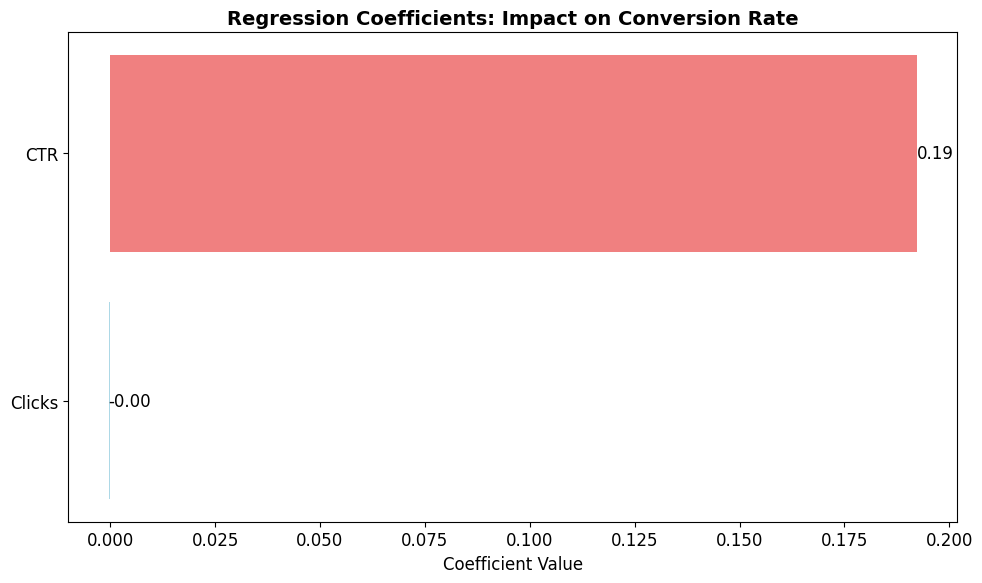

The 'Clicks' coefficient: -0.00
The 'CTR' coefficient: 0.19


<ipython-input-72-46108354acdd>:49: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



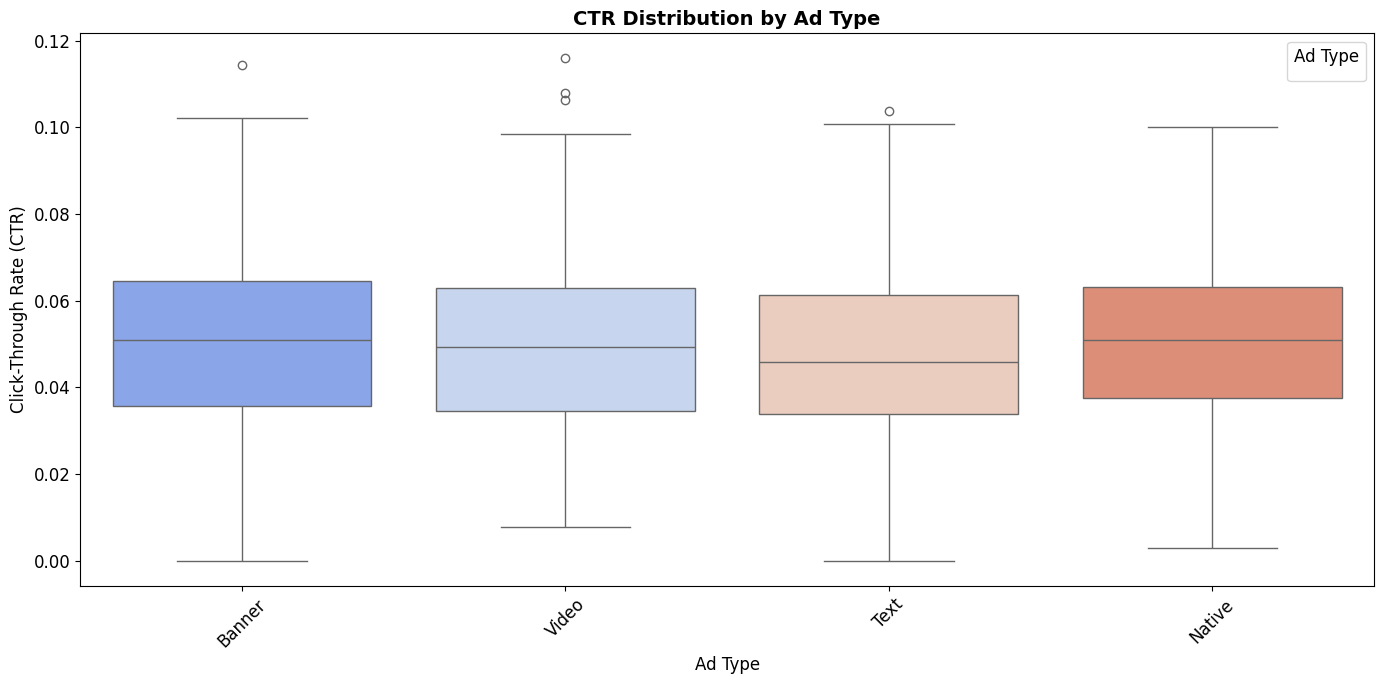

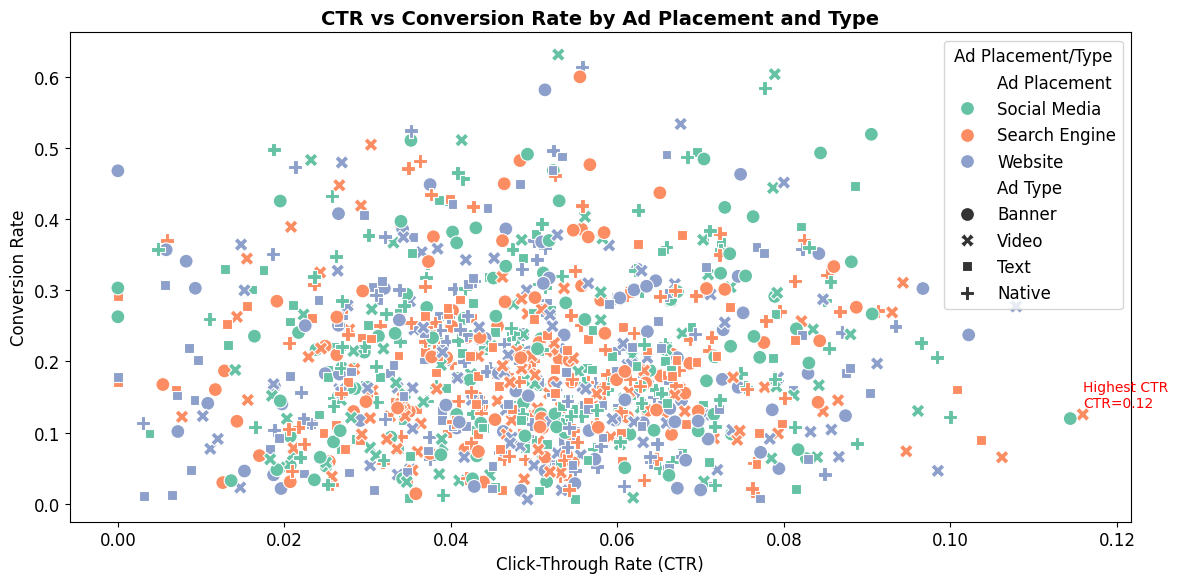

Error saving the interactive chart: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido

Ensure Kaleido is correctly installed and the runtime was restarted if necessary.


In [72]:
 # Install kaleido to enable Plotly image export
!pip install -U kaleido

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np
import plotly.io as pio  # Explicit Plotly image export handling

# Prepare data (assuming consumer_behavior_data exists)
X = consumer_behavior_data[['Clicks', 'CTR']]
y = consumer_behavior_data['Conversion Rate']

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
coefficients = linear_model.coef_
feature_names = ['Clicks', 'CTR']

# Set consistent global font style for Matplotlib
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'DejaVu Sans'

# 1. Bar Chart for Regression Coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color=['lightblue', 'lightcoral'])
plt.title("Regression Coefficients: Impact on Conversion Rate", fontsize=14, weight='bold')
plt.xlabel("Coefficient Value", fontsize=12)
# Annotate coefficients on the chart
for i, coef in enumerate(coefficients):
    plt.text(coef, i, f"{coef:.2f}", fontsize=12, va='center')
plt.tight_layout()
plt.savefig("Regression_Coefficients.png", dpi=300, bbox_inches="tight")
plt.show()

# Print Regression Insights
print(f"The 'Clicks' coefficient: {coefficients[0]:.2f}")
print(f"The 'CTR' coefficient: {coefficients[1]:.2f}")

# 2. Boxplot for CTR by Ad Type
plt.figure(figsize=(14, 7))
sns.boxplot(data=consumer_behavior_data, x='Ad Type', y='CTR', hue='Ad Type', palette='coolwarm')
plt.title("CTR Distribution by Ad Type", fontsize=14, weight='bold')
plt.xlabel("Ad Type", fontsize=12)
plt.ylabel("Click-Through Rate (CTR)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Ad Type", loc='upper right')
plt.tight_layout()
plt.savefig("CTR_by_Ad_Type.png", dpi=300, bbox_inches="tight")
plt.show()

# 3. Scatter Plot for CTR vs Conversion Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(data=consumer_behavior_data, x='CTR', y='Conversion Rate', hue='Ad Placement',
                style='Ad Type', palette='Set2', s=100, legend='full')
plt.title("CTR vs Conversion Rate by Ad Placement and Type", fontsize=14, weight='bold')
plt.xlabel("Click-Through Rate (CTR)", fontsize=12)
plt.ylabel("Conversion Rate", fontsize=12)
plt.legend(title="Ad Placement/Type", loc='best')

# Annotate highest CTR point
top_ctr = consumer_behavior_data.iloc[consumer_behavior_data['CTR'].idxmax()]
plt.text(top_ctr['CTR'], top_ctr['Conversion Rate'] + 0.01,
         f"Highest CTR\nCTR={top_ctr['CTR']:.2f}", color='red', fontsize=10)
plt.tight_layout()
plt.savefig("CTR_Conversion_Rate.png", dpi=300, bbox_inches="tight")
plt.show()

# 4. Interactive Plotly Bar Chart
fig = px.bar(
    consumer_behavior_data,
    x='Ad Placement',
    y='CTR',
    color='Ad Type',
    hover_data=['Clicks', 'Conversion Rate'],
    title="Interactive CTR by Ad Placement and Type",
    labels={'CTR': 'Click-Through Rate'},
    color_discrete_map={'Video': 'hotpink', 'Banner': 'blue', 'Text': 'lightgreen', 'Native': 'orange'}
)

fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

# Add annotation for the best-performing ad
best_ad = consumer_behavior_data.iloc[consumer_behavior_data['CTR'].idxmax()]
fig.add_annotation(
    x=best_ad['Ad Placement'], y=best_ad['CTR'],
    text=f"Best CTR: {best_ad['CTR']:.2f}\nPlacement: {best_ad['Ad Placement']}",
    showarrow=True, arrowhead=2
)

# Show Plotly chart in notebook
fig.show()

# Save the Plotly chart as an image using Kaleido
try:
    fig.write_image("Interactive_CTR_BarChart.png")
    print("Interactive chart saved successfully as 'Interactive_CTR_BarChart.png'")
except Exception as e:
    print("Error saving the interactive chart:", e)
    print("Ensure Kaleido is correctly installed and the runtime was restarted if necessary.")


In [ ]:
# Prepare the data
X = consumer_behavior_data[['Age', 'Income']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
consumer_behavior_data['Cluster'] = kmeans.fit_predict(X)

# View cluster assignments
print(consumer_behavior_data[['Age', 'Income', 'Cluster']].head())

### What are the relationships between brands based on cross-shopping patterns?
Perform association rule mining using the `crossshopbrandbreakoutcleaned(Sheet2).csv` dataset.


In [ ]:
# Prepare the data
basket = pd.pivot_table(
    data=crossshop_data,
    index='Brand Name',
    columns='Cross Brand Name',
    values='Transaction Count',
    aggfunc='sum',
    fill_value=0
)

# Apply Apriori Algorithm
frequent_items = apriori(basket, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

# View association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


### How can predictive models optimize future campaign outcomes?
Use Neural Networks to predict campaign performance using the `CONSUMERBEHAVIOR.csv` dataset.


In [ ]:
# Prepare the data
X = consumer_behavior_data[['Clicks', 'CTR']]
y = consumer_behavior_data['Conversion Rate']

# Build Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Predict outcomes
predictions = model.predict(X)
print(predictions[:5])

In [ ]:
## How to Use
Follow the steps below:
1. Clone the repository:
   ```bash
   git clone https://github.com/sisi195/MarketMind.git
